<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [43]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [44]:
# Start coding here! Use as many cells as you like
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [45]:
# Start by describing the dataset 
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


We notice that the only columns being described are the number columns, the rest are text which cannot be described with these metrics.

# Most frequent movie duration in the 1990s

Considering that 1990 is the decade's start year

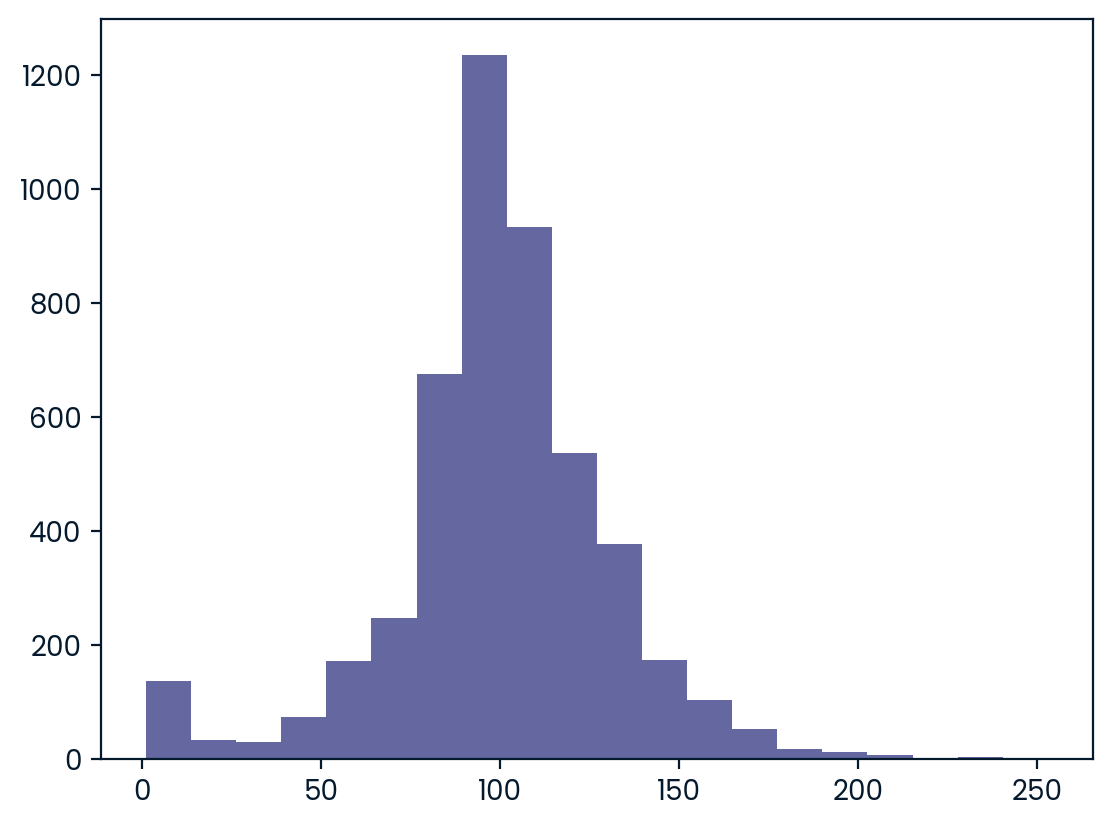

In [46]:
plt.hist(netflix_df.loc[:,'duration'], bins=20)
plt.show()

From this very simple histogram we can already see the distribution of the durations of the movies, we already see some interesting, possibly wrong data from all those movies right next to 0 minutes of duration.

Let's start by building a DataFrame that allows us to know the frequencies for each duration:

In [47]:
dur_freq = netflix_df.value_counts('duration').reset_index()
dur_freq.columns = ['duration', 'frequency']
print(dur_freq.head())

   duration  frequency
0        93        121
1        94        119
2        90        114
3        95        111
4        97        107


Now we can plot the top 10 frequencies to get the most common

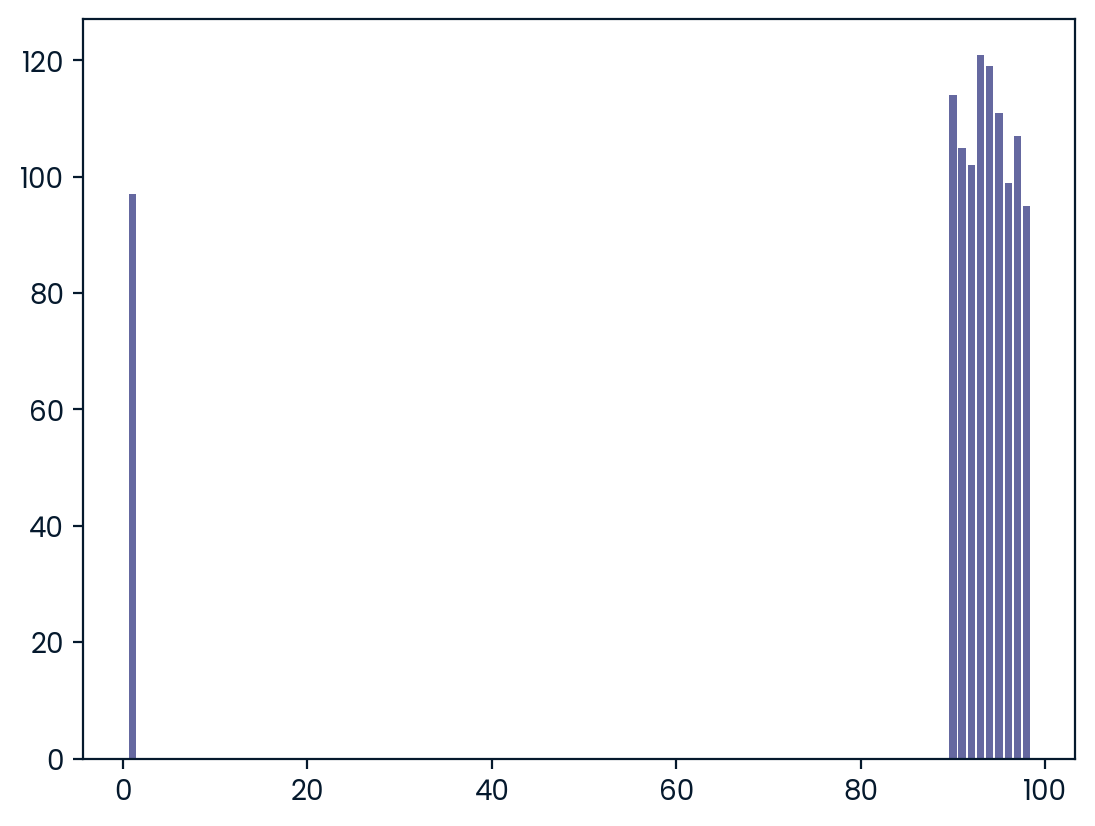

In [48]:
top10 = dur_freq.sort_values('frequency', ascending=False).head(10)

plt.bar(top10['duration'], top10['frequency'])  # bar plot is better for categories
plt.show()

And finally we can get the most frequent time:

In [49]:
duration = dur_freq.sort_values('frequency', ascending=False).head(1)
duration = duration['duration'][0]
print("The most common duration of the dataset is: ", duration)

The most common duration of the dataset is:  93


# Short action movies
To get the number of short actions movies we can first filter to get only the action movies, then use boolean slicing to get the rows where the durations is < 90 minutes and then filter by the movies whose `release_year` >= 1990 & `release_year` <= 1999.

In [50]:
action_movies = netflix_df[netflix_df['genre'] == 'Action']
action_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
16,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,128,"A taxi driver, a gangster and an athlete strug...",Action
32,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,93,"Aiming to hasten an uprising, the leader of an...",Action
37,s51,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",United States,"June 1, 2019",2008,109,Fierce mammoth hunter D'Leh sets out on an imp...,Action
44,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...",Hong Kong,"April 3, 2019",2010,113,"In the age of the Ming Dynasty, Quinglong is t...",Action


In [51]:
short_action_movies = action_movies[action_movies['duration'] < 90]
short_action_movies.describe()

,release_year,duration
count,80.000000,80.000000
mean,2009.862500,82.575000
std,11.426976,8.613758
min,1973.000000,40.000000
25%,2007.750000,81.000000
50%,2015.000000,85.000000
75%,2017.000000,88.000000
max,2020.000000,89.000000


As we can see from the description, the max value for the duration column is 89, so the filter worked and we can already see the count is 80, but we're going to confirm it by code

In [52]:
short_action_movies.shape

(80, 11)

Now we need to filter by `1990 <= release_year <= 1999`

In [53]:
short_action_movies90s = short_action_movies[(short_action_movies['release_year'] >= 1990) & (short_action_movies['release_year'] <= 1999)]
short_action_movies90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action


Now we can get the amount of short action movies in the 90s decade by looking at the shape of the resulting DataFrame

In [54]:
print(short_action_movies90s.shape)
short_movie_count = short_action_movies90s.shape[0]
print("Amount of short action movies in the 90s decade: ", short_movie_count)

(7, 11)
Amount of short action movies in the 90s decade:  7
